In [25]:
import sys
sys.path.append("C:/Users/danie/Documents/School/MEEN537/HW")
sys.path.append("/home/daniel/Documents/MEEN537/HW/")
import kinematics as kin
import transforms as tr
import numpy as np
np.set_printoptions(precision=4, suppress=True)

L0 = .27035
L1 = 0.069
L2 = .36435
L3 = 0.069
L4 = .37429
L5 = .01
L6 = .3683

dh = [[0, L0, L1, -np.pi/2.0],           # s0
      [np.pi/2.0, 0, 0, np.pi/2],           # s1
      [0, L2, L3, -np.pi/2.0],      # e0
      [0, 0, 0, np.pi/2.0],          # e1
      [0, L4, L5, -np.pi/2.0],  # w0
      [0, 0, 0, np.pi/2.0],                 # w1
      [0, L6, 0, 0]]                     # w2

jt_types = ['r', 'r', 'r', 'r', 'r', 'r', 'r']
base = tr.se3(tr.rotz(-np.pi/4), np.array([0.06353, -.2597, .119]))
arm = kin.SerialArm(dh, jt=jt_types, base=base)

In [26]:
goal_orientation1 = np.array([[ 0.8683185,   0.39483193,  0.3002178 ],
                                [-0.36122015,  0.91816441, -0.16277012],
                                [-0.33991614,  0.03289158,  0.9398804 ]] )
goal_orientation2 = np.array( [[-0.018633,    0.0551828,   0.99830239],
                                [-0.19620563,  0.97885952, -0.05777018],
                                [-0.98038572, -0.19694898, -0.00741191]] )
goal_orientation3 = np.array( [[-0.96998953,  0.22544792, -0.09106889],
                                [-0.03129172 , 0.25568242,  0.96625428],
                                [ 0.24112473,  0.94010624, -0.24095462]] )
goal_orientation4 = np.array([[-0.68165984, -0.55595571,  0.47566071],
                                [-0.21616876,  0.77411061,  0.59499901],
                                [-0.6990071,   0.30276395, -0.64786037]])

goal_orientation1 = tr.R2q(goal_orientation1)
goal_orientation2 = tr.R2q(goal_orientation2)
goal_orientation3 = tr.R2q(goal_orientation3)
goal_orientation4 = tr.R2q(goal_orientation4)
# defining two different sets of joint angles
q_set1 = [0.49816026, -1.19113608,  0.1434272,   0.02109224, -2.38994207,  0.09894176, 2.15102456]
q_set2 = [0.72902437, -0.36815539,  0.09779128,  0.40612141, -2.37191779,  0.05023787, 2.08621387]
q_set3 = [0.62087872, -1.00168945,  0.10814565,  1.51403904, -1.91325754, -1.56926235,  2.86317514]
q_set4 = [1.18461666, -0.76775738,  0.11850002,  0.54417968, -2.83863145, -1.01050984,  3.0422674 ]

print(f"position 1: \n {arm.fk(q_set1, base=True)[:3,-1]}")
print(f"orientation 1: \n {tr.R2q(arm.fk(q_set1, base=True)[:3,:3])}")
print(f"goal orientation 1: {goal_orientation1}")
print()
print(f"position 2: \n {arm.fk(q_set2, base=True)[:3,-1]}")
print(f"orientation 2: \n {tr.R2q(arm.fk(q_set2, base=True)[:3,:3])}")
print(f"goal orientation 2: {goal_orientation2}")


print()
print(f"position 3: \n {arm.fk(q_set3, base=True)[:3,-1]}")
print(f"orientation 3: \n {tr.R2q(arm.fk(q_set3, base=True)[:3,:3])}")
print(f"goal orientation 3: {goal_orientation3}")


print()
print(f"position 4: \n {arm.fk(q_set4, base=True)[:3,-1]}")
print(f"orientation 4: \n {tr.R2q(arm.fk(q_set4, base=True)[:3,:3])}")
print(f"goal orientation 4: {goal_orientation4}")




position 1: 
 [ 0.5646 -0.4329  1.396 ]
orientation 1: 
 [ 0.9656  0.0523  0.1641 -0.1946]
goal orientation 1: [ 0.9652  0.0507  0.1658 -0.1958]

position 2: 
 [ 1.2387 -0.3122  0.4481]
orientation 2: 
 [ 0.7003 -0.0493  0.7066 -0.0884]
goal orientation 2: [ 0.6987 -0.0498  0.708  -0.0899]

position 3: 
 [0.6772 0.0278 0.3915]
orientation 3: 
 [ 0.1048 -0.0597 -0.7847 -0.608 ]
goal orientation 3: [ 0.1058 -0.0618 -0.7853 -0.6069]

position 4: 
 [0.9114 0.2735 0.4488]
orientation 4: 
 [ 0.3353 -0.22    0.8796  0.2559]
goal orientation 4: [ 0.3334 -0.2191  0.8809  0.2548]


In [ ]:
import sys
sys.path.append("C:/Users/danie/Documents/School/MEEN537/HW")
sys.path.append("/home/daniel/Documents/MEEN537/HW/")
import kinematics as kin
from visualization import VizScene
import sympy as sp
import numpy as np
import time
import transforms as tr
np.set_printoptions(precision=4, suppress=True)

# Visualize the arm
viz = VizScene()
viz.add_arm(arm, draw_frames=True)
viz.update(qs=[q_set1])
viz.hold()

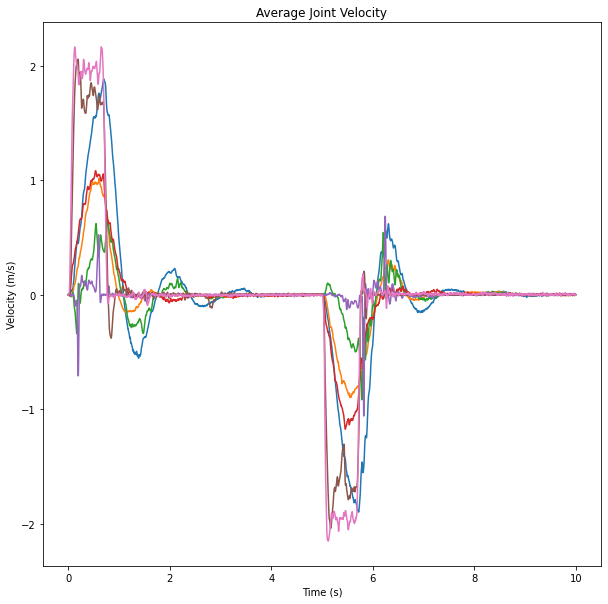

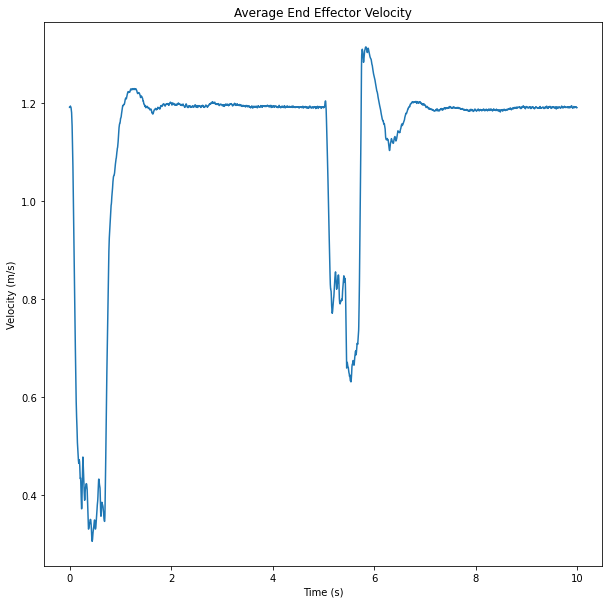

In [38]:
import random
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

t = []
x = []

for i in range(10):
    mat_input = loadmat(f'part3_trial0{i}.mat')
    t.append(mat_input['t'][0])
    x.append(mat_input['q_dot'])

x_avg = np.mean(x, axis=0)
t_avg = np.mean(t, axis=0)


end_effector_velocity = []
for i in x_avg:
    end_effector_velocity.append(np.linalg.norm(arm.fk(i)[:3,-1]))

f, ax = plt.subplots()
f.set_figwidth(10)
f.set_figheight(10)
ax.plot(t_avg, x_avg, linestyle='-')  # k is the color black, and '-' is a solid line
# ax.legend(['jt1', 'jt2', 'jt3', 'jt4', 'jt5', 'jt6', 'jt7'])
ax.set_xlabel('Time (s)')
ax.set_ylabel("Velocity (m/s)")
ax.set_title("Average Joint Velocity")


f, ax = plt.subplots()
f.set_figwidth(10)
f.set_figheight(10)
ax.plot(t_avg, end_effector_velocity, linestyle='-')  # k is the color black, and '-' is a solid line
ax.set_xlabel('Time (s)')
ax.set_ylabel("Velocity (m/s)")
ax.set_title("Average End Effector Velocity")


plt.show()
